In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

### Transpose data

In [3]:
# Load the CSV files
df_normalized_results = pd.read_csv('../data/stage/pytrends/normalized_results_2023/normalized_results_2023.csv', sep=';')

# Transpose the DataFrame
df_transposed = df_normalized_results.transpose()

# Make the first row as the header
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]

# Save the reshaped DataFrame to a CSV file, keeping the old column names in the first column
df_transposed.to_csv("2023_df_normalized_results_reshaped.csv", sep=';')

In [7]:
# Load the CSV files
df_normalized_results = pd.read_csv('../../data/processed/google_trends/2023_normalized_popularity.csv', sep=';')
df_articles = pd.read_csv('../../data/interim/annotated_articles/automated_combined/by_year/2023_articles_automated_annotated.csv', sep=';')

df_articles['Tags'] = df_articles['Tags'].str.lower()
#When csv is loaded, the Tags array is recognized as a string, this casts it to an array
df_articles['Tags'] = df_articles['Tags'].apply(ast.literal_eval)


# Initialize a new column 'Score' with zeros
df_articles['Score'] = 0

# Iterate over the rows in df_articles
for i, row in df_articles.iterrows():
    # For each tag, look up the corresponding value in df_normalized_results for the specific date
    for tag in row['Tags']:
        if tag in df_normalized_results['Keywords'].values:
            # Get the index of the tag in df_normalized_results
            index = df_normalized_results.index[df_normalized_results['Keywords'] == tag].tolist()[0]

            # Use the index to get the value
            df_articles.at[i, 'Score'] += df_normalized_results.loc[index, row['Date']]
df_articles.to_csv("2023_articles_automated_annotated_res.csv", sep=';')


/var/folders/sh/fjb1r_5j6gxcy4lzfcc4_4zr0000gn/T/ipykernel_26553/986912767.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_articles.at[i, 'Score'] += df_normalized_results.loc[index, row['Date']]


In [8]:
# Load the CSV file
df = pd.read_csv('2023_articles_automated_annotated_res.csv', sep=';')

# Transform the 'Tags' column into a list
df['Tags'] = df['Tags'].apply(ast.literal_eval)

# Create a new column 'avg_score'
df['Average Score'] = df.apply(lambda row: row['Score'] / len(row['Tags']), axis=1)

# Save the DataFrame to a CSV file
df.to_csv('2023_articles_automated_annotated_res_avg.csv',  sep=';', index=False)

print(df)

      Unnamed: 0                                              Title  \
0              0  ‘Can’t make this stuff up’: California sinkhol...   
1              1  Australia’s Harry Souttar makes Premier League...   
2              2  Casa Susanna review – this portrait of queer l...   
3              3  Everton’s barren window prompts angry fans to ...   
4              4  Tottenham complete Pedro Porro signing from Sp...   
...          ...                                                ...   
7772        7772  Princess of Wales launches childhood campaign ...   
7773        7773  Tory MPs challenge chancellor Jeremy Hunt on t...   
7774        7774  Treasury reveals 'world-first' proposals to re...   
7775        7775  1,000 Border Force officers to go on strike fo...   
7776        7776  Alec Baldwin charged with involuntary manslaug...   

            Date                      Authors  \
0     2023-01-31            ['Dani Anguiano']   
1     2023-01-31           ['Guardian sport']   


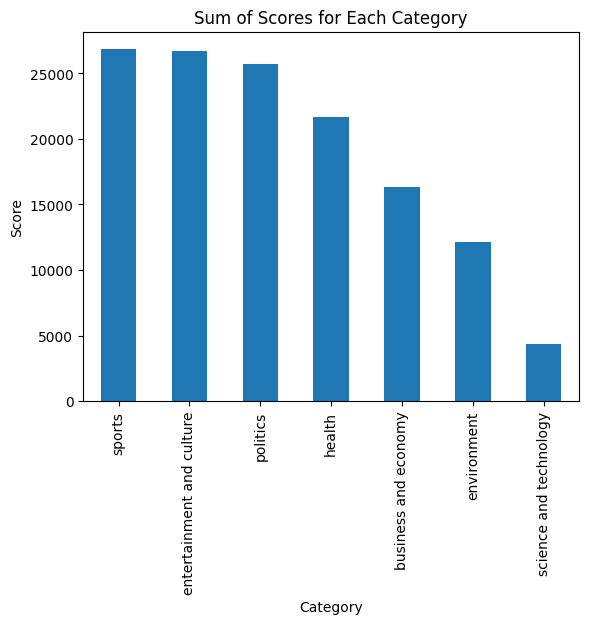

In [4]:
# Load the CSV file
df = pd.read_csv('2022_df_normalized_results_score_avg.csv', sep=';')

# Group by the 'Chat GPT' column and sum the 'Score' column
df_grouped = df.groupby('Chat GPT')['avg_score'].sum()

# Sort the grouped DataFrame in descending order
df_grouped = df_grouped.sort_values(ascending=False)

# Plot the sum of the scores for each category
df_grouped.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Sum of Scores for Each Category')
plt.show()

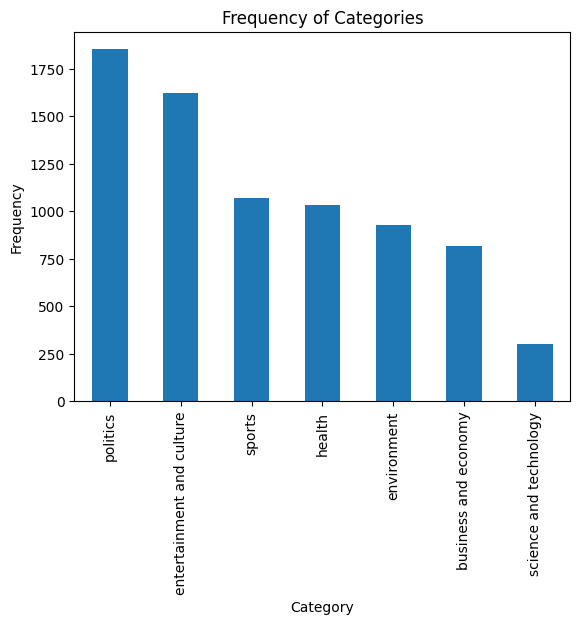

In [7]:
# Load the data
df = pd.read_csv("../data/annotation/_final/2022_January_all_articles_annotated.csv", sep=';')

# Count the frequency of each category
category_counts = df['Chat GPT'].value_counts()

# Plot the frequencies
category_counts.plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

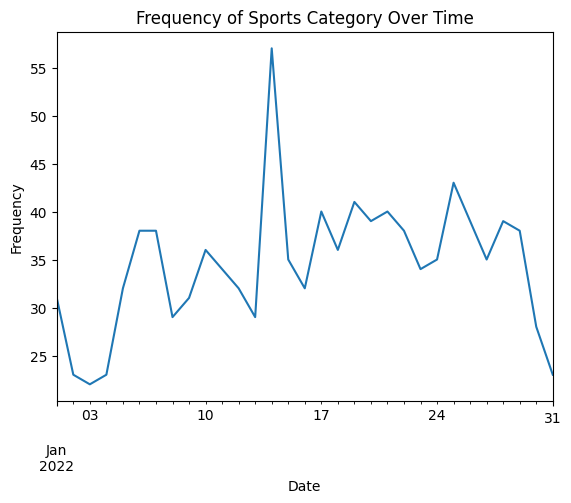

In [26]:
# Load the CSV file
df = pd.read_csv('2022_df_normalized_results_score_avg.csv', sep=';')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame for the 'Sports' category
df_sports = df[df['Chat GPT'] == 'sports']

# Group by the 'Date' column and count the frequency
df_grouped = df_sports.groupby(df_sports['Date'].dt.to_period('D')).size()

# Plot the frequency over time
df_grouped.plot(kind='line')
plt.title('Frequency of Sports Category Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

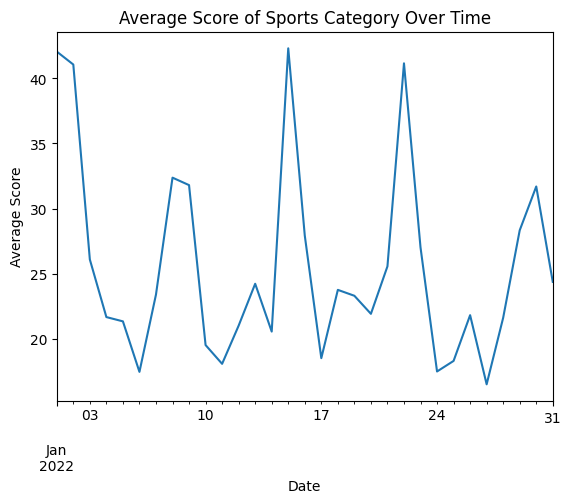

In [27]:
# Load the CSV file
df = pd.read_csv('2022_df_normalized_results_score_avg.csv', sep=';')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame for the 'Sports' category
df_sports = df[df['Chat GPT'] == 'sports']

# Group by the 'Date' column and calculate the average score
df_grouped = df_sports.groupby(df_sports['Date'].dt.to_period('D'))['avg_score'].mean()

# Plot the average score over time
df_grouped.plot(kind='line')
plt.title('Average Score of Sports Category Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.show()

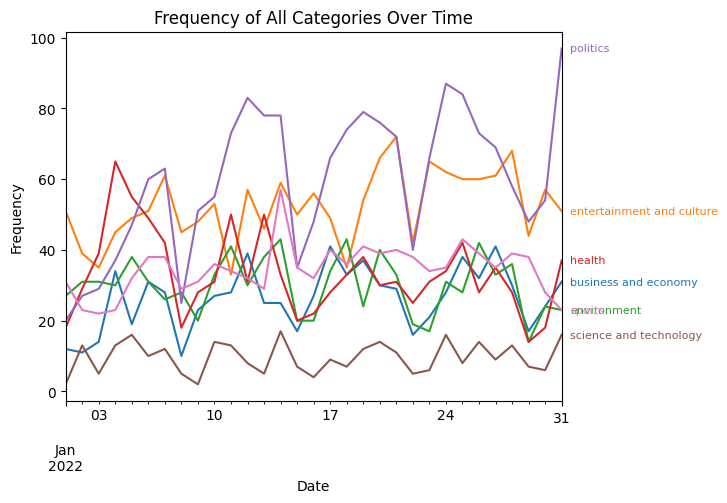

In [23]:
# Load the CSV file
df = pd.read_csv('2022_df_normalized_results_score_avg.csv', sep=';')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by the 'Date' and 'Chat GPT' columns and count the frequency
df_grouped = df.groupby([df['Date'].dt.to_period('D'), 'Chat GPT']).size().reset_index(name='Frequency')

# Pivot the DataFrame
df_pivot = df_grouped.pivot(index='Date', columns='Chat GPT', values='Frequency')

# Plot the frequency over time for all categories
ax = df_pivot.plot(kind='line', legend=False)

# Set the title and labels
plt.title('Frequency of All Categories Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Iterate over the lines and add a label to the end of each line
for line, name in zip(ax.lines, df_pivot.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=8, va="center")

plt.show()